In [1]:
#Importing the csv file from my local machine
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset

df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.isna().any()

,0
Id,False
SepalLengthCm,False
SepalWidthCm,False
PetalLengthCm,False
PetalWidthCm,False
Species,False


There are no Null values in this dataset.

In [5]:
df.dtypes

,0
Id,int64
SepalLengthCm,float64
SepalWidthCm,float64
PetalLengthCm,float64
PetalWidthCm,float64
Species,object


The datatypes of this dataset seem to be in order.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
print(df.size)


900


total number of elements in the entire dataframe is 900

In [16]:
print("\nBasic Statistics:\n", df.describe())


Basic Statistics:
                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


Some features appear to be normally distributed, particularly SepalWidthCM and PetalLenghtCM but we will check this out.

In [19]:
#Grouping to find the mean of the features in this dataset
grouped = df.groupby(['Species']).mean()
print("\nAverage Measurements per Species:\n", grouped)




Average Measurements per Species:
                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Species                                                              
Iris-setosa       25.5          5.006         3.418          1.464   
Iris-versicolor   75.5          5.936         2.770          4.260   
Iris-virginica   125.5          6.588         2.974          5.552   

                 PetalWidthCm  
Species                        
Iris-setosa             0.244  
Iris-versicolor         1.326  
Iris-virginica          2.026  


the Iris-Virginica seems to take the lead by having the highest mean across all features

In [21]:
# Calculate the mean of all numerical columns
column_means = df.mean(axis=0, numeric_only=True)
print(column_means)


Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## **Data Visualization**

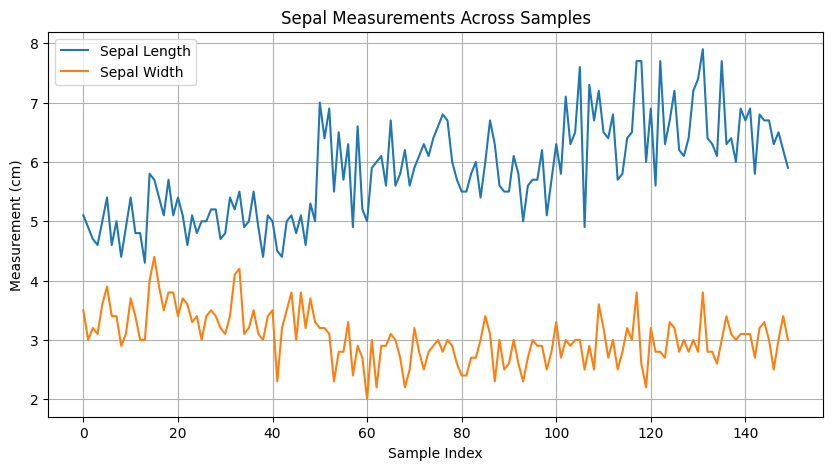

In [32]:
# Line Chart (since Iris data is not a time series, we'll simulate an index)
plt.figure(figsize=(10,5))
plt.plot(df.index, df['SepalLengthCm'], label='Sepal Length')
plt.plot(df.index, df['SepalWidthCm'], label='Sepal Width')
plt.title('Sepal Measurements Across Samples') #adding the title of the chart
plt.xlabel('Sample Index') #Giving a label to the X axis of the chart
plt.ylabel('Measurement (cm)')
plt.legend() #Adding a legend
plt.grid(True) #adding gridlines to the chart since we are using a line chart
plt.show()


so there appears to be a significant increase between data point 100-150 in the line chart, which might be the presence of other species or maybe outlier values.

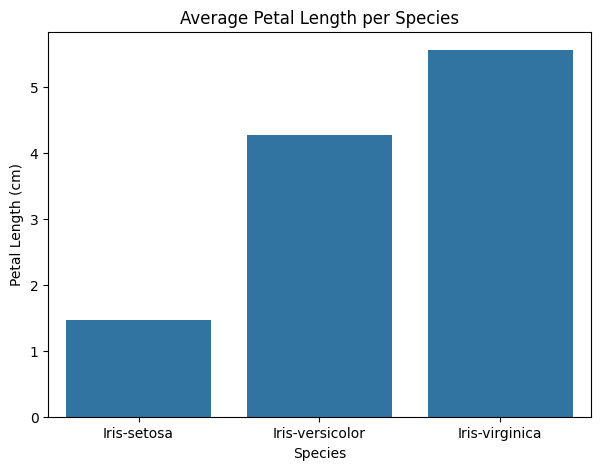

In [27]:

# Bar Chart: Average petal length per species
plt.figure(figsize=(7,5))
sns.barplot(x='Species', y='PetalLengthCm', data=df, errorbar=None)
plt.title('Average Petal Length per Species') # adding the title of the chart
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()



We had seen this earlier with the measures of the average of the features in the dataset but here it is clear that Iris-Virginica has the highest average petal length across all species.

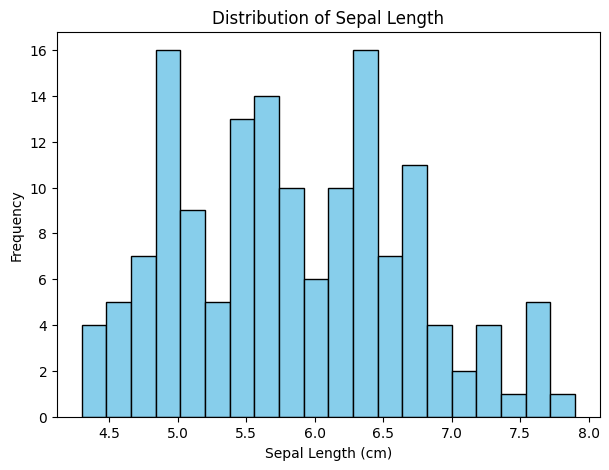

In [28]:
# Histogram: Distribution of Sepal Length
plt.figure(figsize=(7,5)) #adjusting the chart size
plt.hist(df['SepalLengthCm'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()


like i said earlier, the Sepal Length had a normal distribution when looking at the descriptive statistics table, however, the chart shows a normal distribution in the Sepal Length column, and the values tend to have a peak at 6.48 and 4.9

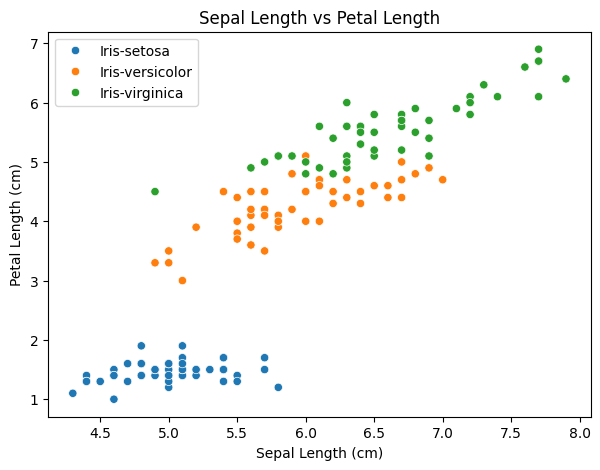

In [31]:

# Scatter Plot: Sepal Length vs. Petal Length
plt.figure(figsize=(7,5))
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=df)
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()

There seems to be a positive correlation between iris Virginica and verisicolor, but there appears to be no correlation at all between iris-seritosa and the other species.